In [1]:
#importing libraries 
import datetime
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Importing DataSet


In [2]:
Cab_Data = pd.read_csv("Cab_Data.csv")
City =pd.read_csv("City.csv")
Customer_ID=pd.read_csv("Customer_ID.csv")
Transaction_ID=pd.read_csv("Transaction_ID.csv")

   ## Cab Data

In [3]:
Cab_Data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# Change the type of Date of Travel datatype into DateTime 
from datetime import datetime, timedelta
def date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date

In [5]:
# Findind Day on that date
def findDay(date):
    day = date.weekday()
    return (calendar.day_name[day])

In [6]:
# Updating Date Column
Cab_Data['Date of Travel'] = Cab_Data['Date of Travel'].apply(lambda x:date_format(x))


In [7]:
# Adding a Day Name column in the dataset
Cab_Data['Day_Name']= Cab_Data['Date of Travel'].apply(lambda x:findDay(x))

In [8]:
Cab_Data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day_Name
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Thursday
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Tuesday
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Friday
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Wednesday
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Saturday


In [9]:
# Adding Profit column by taking the difference of 'Price Charged' and 'Cost of Trip'.
Cab_Data['Profit'] = Cab_Data['Price Charged'] - Cab_Data['Cost of Trip']

In [10]:
Cab_Data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day_Name,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Thursday,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Tuesday,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Friday,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Wednesday,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Saturday,16.844


In [11]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Day_Name        359392 non-null  object        
 8   Profit          359392 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 24.7+ MB


In [12]:
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Day_Name          0
Profit            0
dtype: int64

From above information we can say that there is no NULL value present in cab dataset

In [13]:
Cab_Data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000


In [14]:
print("Shape of Cab Data", Cab_Data.shape)

Shape of Cab Data (359392, 9)


In [15]:
Cab_Data.duplicated().sum()

0

There is no duplicate value present in cab dataset

In [16]:
Cab_Data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [17]:
Cab_Data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

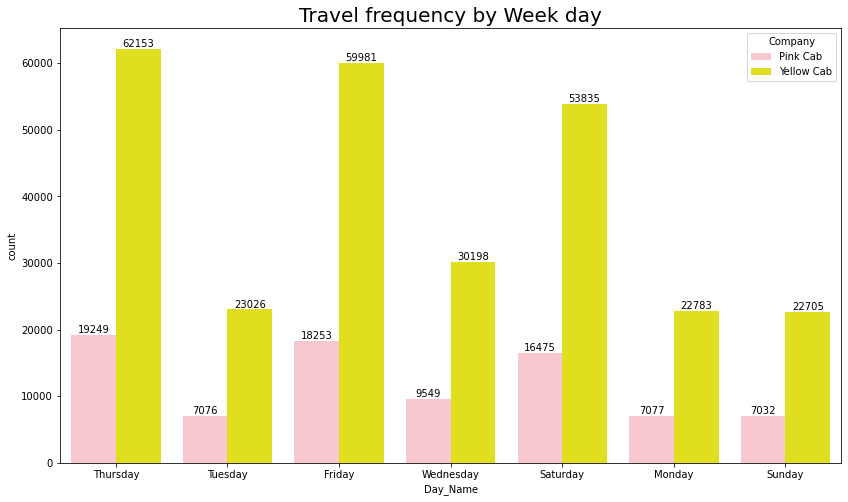

In [18]:
f, ax = plt.subplots(figsize=(14, 8))
colors = ["pink", "yellow"]
sns.set_palette(sns.color_palette(colors))
plt.title('Travel frequency by Week day', fontsize=20)
ax = sns.countplot(x='Day_Name', hue='Company', data=Cab_Data)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

From the above plot, we can say that on Thursday many users use the cab services and on Sunday least users use the cab services.

## City Data

In [19]:
City.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [20]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [21]:
# Population column should be an integer
City['Population'] = [x.replace(',','') for x in City['Population']]
City['Population'] = City['Population'].astype(float)

# Users column should be an integer
City['Users'] = [x.replace(',','') for x in City['Users']]
City['Users'] = City['Users'].astype(float)

In [22]:
# Check the type
City.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [23]:
City.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [24]:
print("Shape of City Data", City.shape)

Shape of City Data (20, 3)


In [25]:
City.duplicated().sum()

0

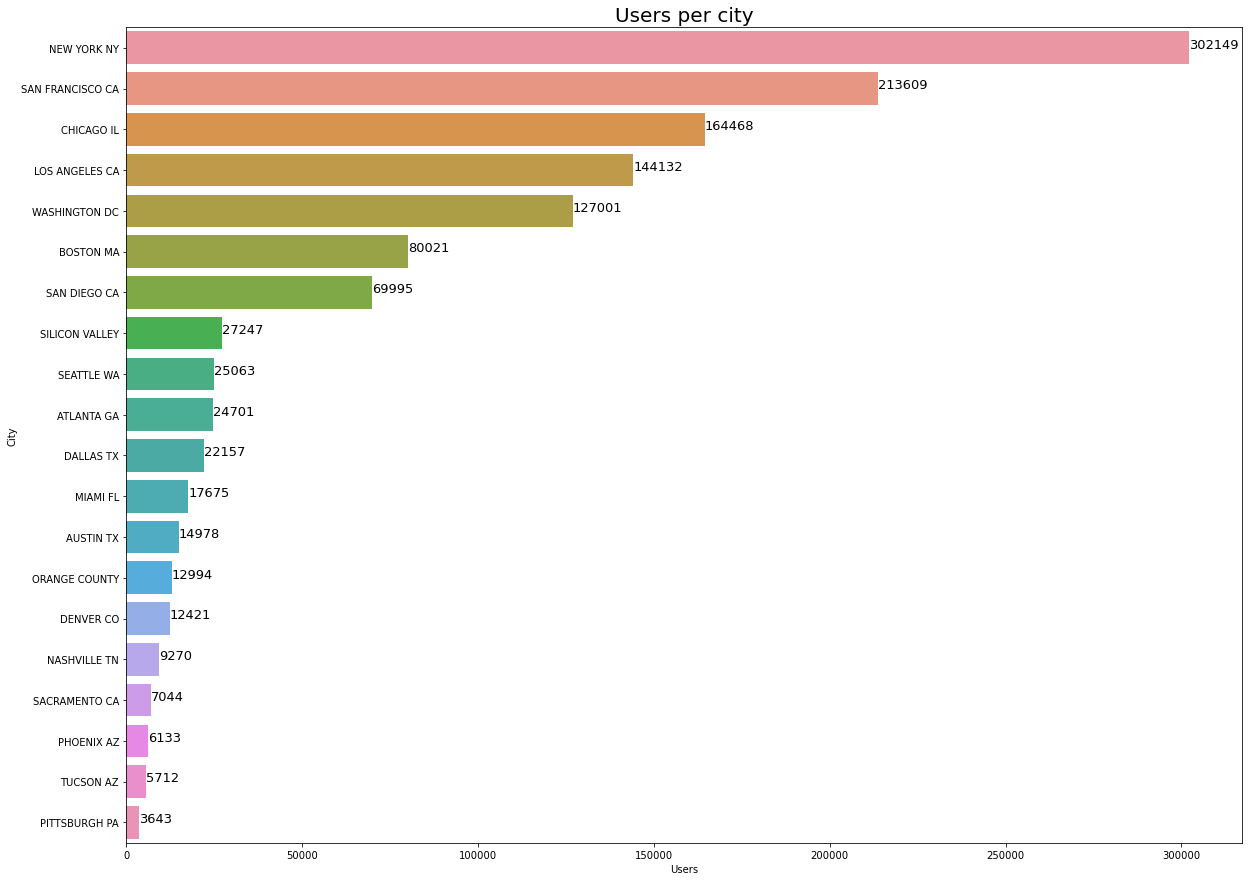

In [26]:
# users per city
users_per_city=pd.DataFrame(City.groupby("City")["Users"].sum().sort_values(ascending=False))
users_per_city.reset_index(inplace=True)

plt.figure(figsize=(20, 15));
g=sns.barplot(x="Users", y="City", data=users_per_city);
for i, v in enumerate(users_per_city.Users):
    g.text(v, i, str(int(v)), fontsize=13)
plt.title('Users per city', fontsize=20);

<AxesSubplot:title={'center':' Users Present Per City'}, ylabel='Users'>

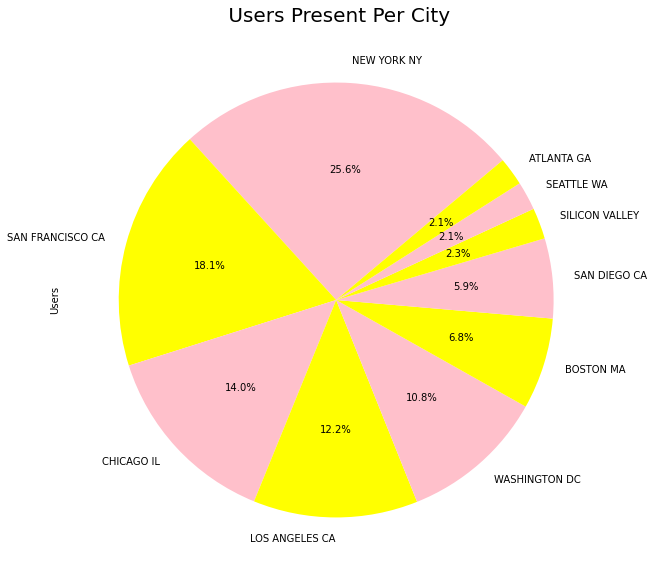

In [27]:
# Top 10 cities by users
plt.figure(figsize=(15, 10));
plt.title(" Users Present Per City", fontsize=20)
City.groupby("City")["Users"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,autopct='%1.1f%%')

## Customer ID


In [28]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [29]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [30]:
print("Shape of Customer_ID", Customer_ID.shape)


Shape of Customer_ID (49171, 4)


In [31]:
Customer_ID.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [32]:
Customer_ID.duplicated().sum()

0

## Transaction ID

In [33]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [34]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [35]:
print("Shape of Transaction_ID", Transaction_ID.shape)


Shape of Transaction_ID (440098, 3)


In [36]:
Transaction_ID.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [37]:
Transaction_ID.duplicated().sum()

0

## Data Merge

Now we are merging out data, In the Cab dataset we merge it with the Transaction ID dataset on 'Transaction_ID' and also merge Customer_ID on 'Customer ID'and City dataset on 'City' columns.

In [38]:
df= Cab_Data.merge(Transaction_ID, on= 'Transaction ID').merge(Customer_ID, on ='Customer ID').merge(City, on = 'City')
df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day_Name,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Thursday,57.3150,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Friday,281.2772,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Thursday,194.6480,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Tuesday,23.6660,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Friday,253.9808,27703,Card,Male,27,9237,814885.0,24701.0


In [39]:
#Adding columns for year,month,day
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day


In [40]:
#Columns names in the merge dataset
df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Day_Name', 'Profit', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Population',
       'Users', 'Year', 'Month', 'Day'],
      dtype='object')

In [41]:
df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day_Name,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Thursday,57.3150,29290,Card,Male,28,10813,814885.0,24701.0,2016,1,7
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Friday,281.2772,29290,Cash,Male,28,10813,814885.0,24701.0,2018,7,20
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Thursday,194.6480,29290,Card,Male,28,10813,814885.0,24701.0,2018,11,22
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Tuesday,23.6660,27703,Card,Male,27,9237,814885.0,24701.0,2016,1,5
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Friday,253.9808,27703,Card,Male,27,9237,814885.0,24701.0,2018,4,20


In [42]:
df.shape

(359392, 19)

<AxesSubplot:title={'center':' Users Present Per City'}, ylabel='Users'>

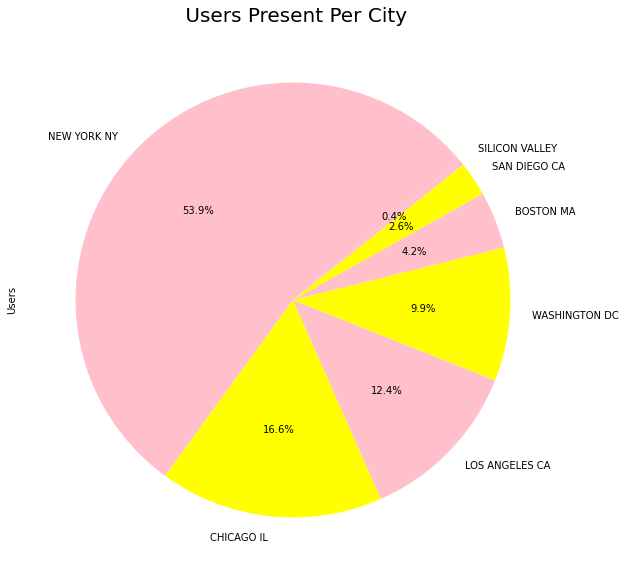

In [43]:
# Top 10 cities by users
plt.figure(figsize=(15, 10));
plt.title(" Users Present Per City", fontsize=20)
df.groupby("City")["Users"].sum().sort_values(ascending=False).head(7).plot(kind='pie',startangle=40,autopct='%1.1f%%')

From the above Pie plot, we can say 53% of users are from New York City 

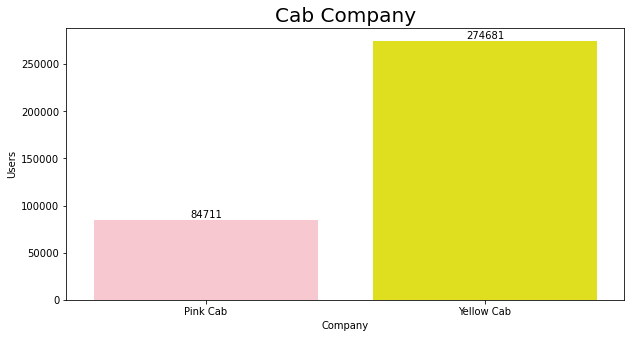

In [44]:
#Number of users of pink and yellow company 
f, ax = plt.subplots(figsize=(10,5))
ax=sns.countplot(data = df, x='Company', palette=['pink', 'yellow'])
plt.title('Cab Company',fontsize=20)
plt.xlabel('Company')
plt.ylabel('Users')
ax.bar_label(ax.containers[0])
plt.show()

From the above plot, we can say that customers use Yellow cabs more as compared to Pink cabs.


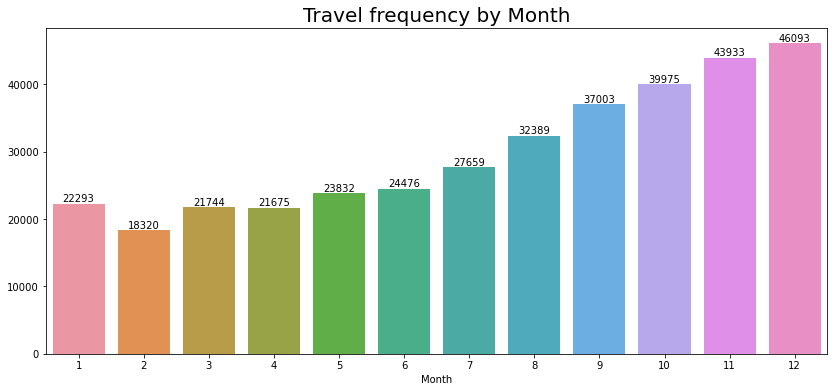

In [45]:
#data grouped bt Transaction ID
mtr=df.groupby(['Month'])['Transaction ID'].count()

#Monthwise Analysis
f,ax=plt.subplots(figsize=(14,6))
ax=sns.barplot(x=mtr.index,y=mtr.values)
plt.title('Travel frequency by Month', fontsize=20)
ax.bar_label(ax.containers[0])

plt.show()

The above plot shows the travel frequency for each month for both companies.

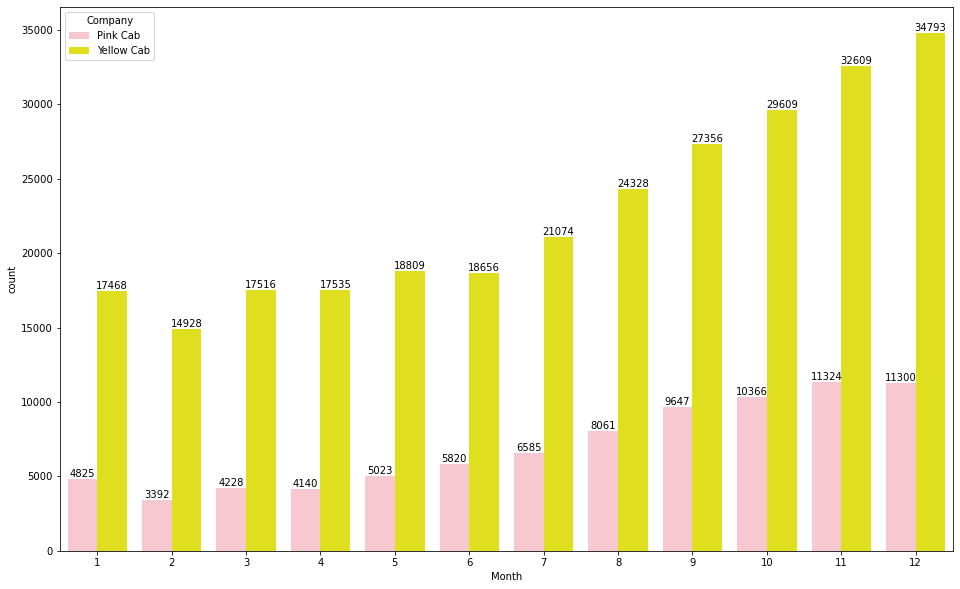

In [46]:
f, ax = plt.subplots(figsize=(16, 10))
# sns.set(style="darkgrid")
ax = sns.countplot(x='Month', hue='Company', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In December higher travelers use cab services it is because of the holiday season. While comparing we can say that the Yellow cab company has higher customers compared to the Pink cab.



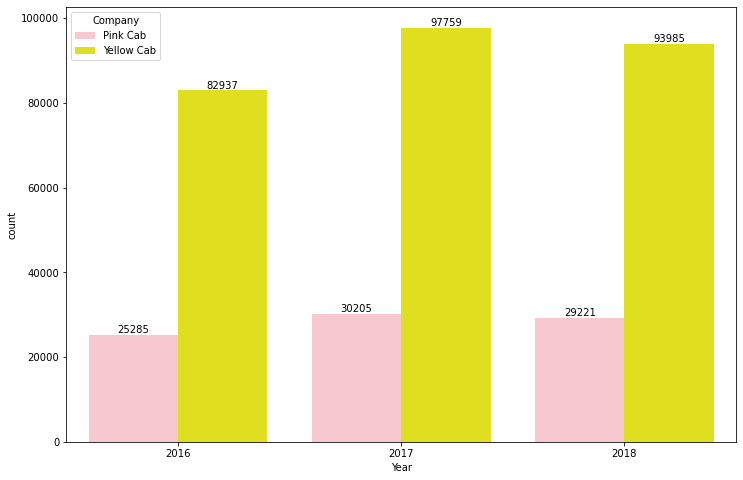

In [47]:

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='Year', hue='Company', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

The above plot shows the travel frequency for each year for both companies.

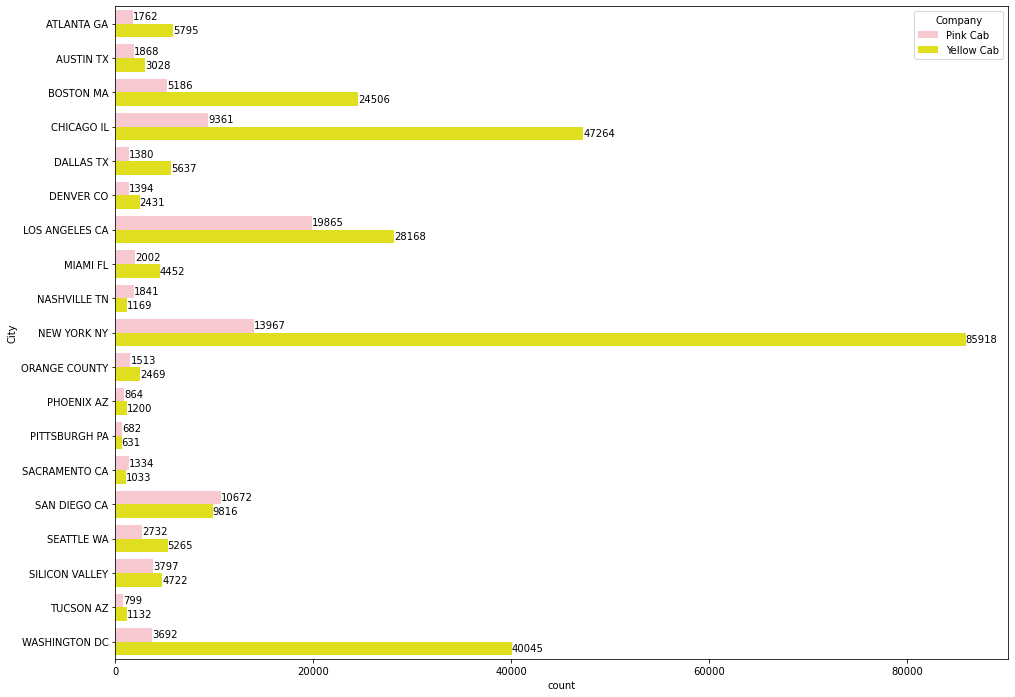

In [48]:
f, ax = plt.subplots(figsize=(16, 12))

ax = sns.countplot(y='City', hue='Company', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

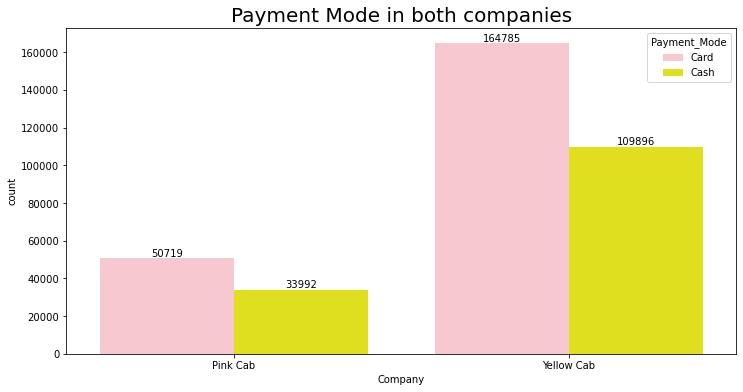

In [49]:
f, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(x='Company', hue='Payment_Mode', data=df)
plt.title('Payment Mode in both companies', fontsize=20)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

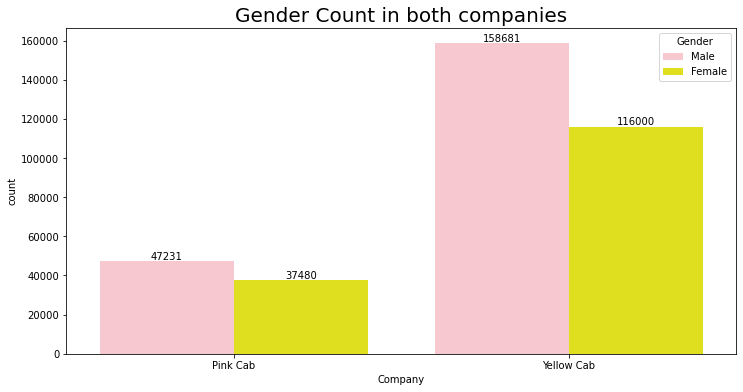

In [50]:
f, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(x='Company', hue='Gender', data=df)
plt.title('Gender Count in both companies', fontsize=20)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

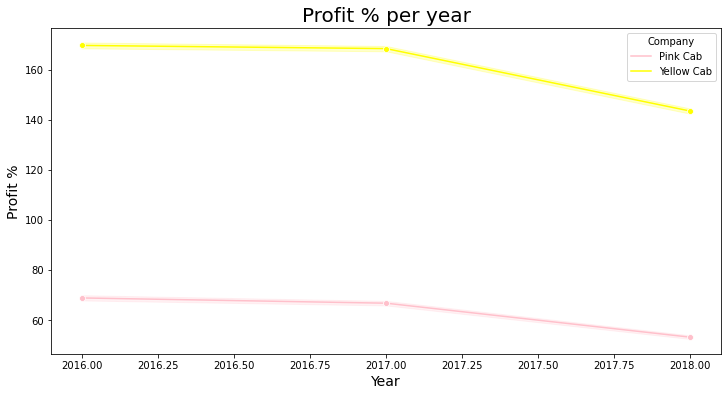

In [51]:
plt.figure(figsize = (12, 6))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year", fontsize=20)
plt.show()

From the above plot, we can say that both companies made a good profit in 2016 compared to 2018.

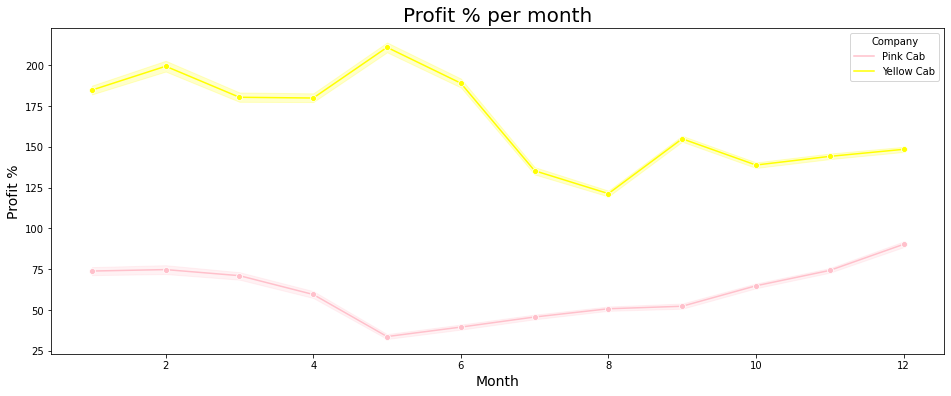

In [52]:
plt.figure(figsize = (16, 6))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month", fontsize=20)
plt.show()

From the above plot, we can say that in the month of May, Yellow Cab has the highest profit margin whereas pink cab has the lowest profit margin.

<AxesSubplot:title={'center':' Profit Per Company '}, ylabel='Profit'>

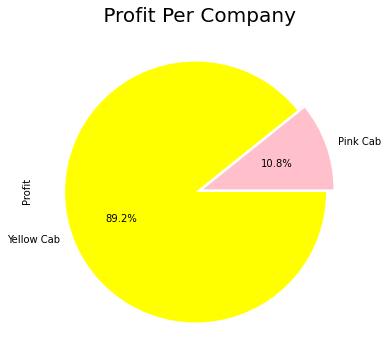

In [53]:
plt.figure(figsize = (16, 6))
plt.title(" Profit Per Company ",fontsize=20)
df.groupby('Company')['Profit'].sum().plot(kind='pie',y='Company',autopct='%1.1f%%',explode=[0.03]*2)


/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajatmaloo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

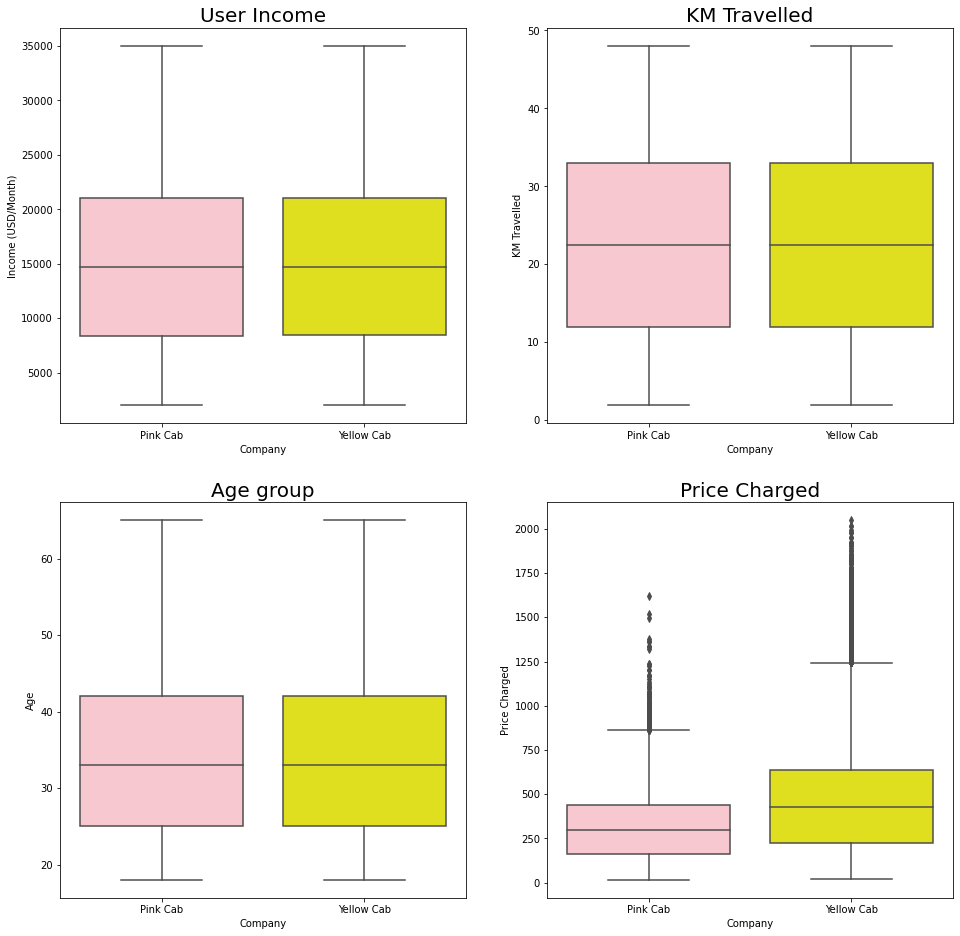

In [54]:
plt.figure(figsize = (16, 16))
plt.subplot(2,2,1)
sns.boxplot(df['Company'], df['Income (USD/Month)'])
plt.title('User Income', fontsize=20)

plt.subplot(2,2,2)
sns.boxplot(df['Company'], df['KM Travelled'])
plt.title('KM Travelled', fontsize=20)

plt.subplot(2,2,3)
sns.boxplot(df['Company'], df['Age'])
plt.title('Age group', fontsize=20)

plt.subplot(2,2,4)
sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Price Charged', fontsize=20)

plt.show()

From the above plot, we can say that Yellow Cab charged more money than Pink Cab. Also, we can say that most of the people who travel in a cab are from the age group 25 to 45 years.

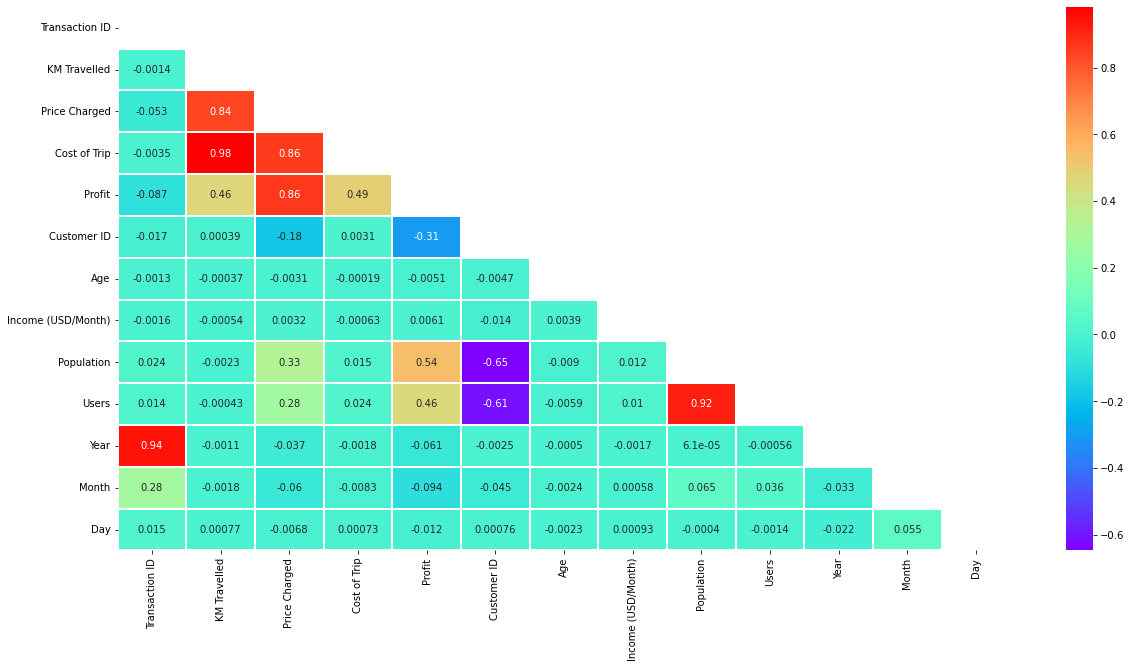

In [55]:
df_corr= df.corr()
matrix = np.triu(df_corr)
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 )
plt.show()

From the above correlation matrix we can say that :

KM Travelled has high correlation with cost of trip and Price Charged

Population and Users are also highly correlated

# HYPOTHESIS
## HYPOTHESIS 1 : Is there any difference in Profit regarding age of users in both the cab companies?
H0 (Null hypothesis): There is no difference in profit regarding age in both the companies

H1 (Alternate Hypothesis): There is difference in profit regarding age in both the companies


In [56]:
import xlrd 
from scipy import stats

In [57]:
# Hypothesis testing for Yellow Cab Company

val1 = df[(df['Age'] < 60)&(df['Company']=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
val2 = df[(df['Age'] >= 60)&(df['Company']=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

t, p_value = stats.ttest_ind(val1.values, val2.values, equal_var=True)

print("P value is: ", p_value)

if(p_value < 0.05):
    print('There is difference in profit regarding age in Yellow company, therefore alternate (H1) hypothesis is selected')
else:
    print('There is no difference in profit regarding age in Yellow company, therefore null (H0) hypothesis is selected')

P value is:  7.618115793609196e-05
There is difference in profit regarding age in Yellow company, therefore alternate (H1) hypothesis is selected


In [58]:
# Hypothesis testing for Pink Cab Company

val1 = df[(df['Age'] < 60)&(df['Company']=='Pink Cab')].groupby('Transaction ID').Profit.mean()
val2 = df[(df['Age'] >= 60)&(df['Company']=='Pink Cab')].groupby('Transaction ID').Profit.mean()

t, p_value = stats.ttest_ind(val1.values, val2.values, equal_var=True)

print("P value is: ", p_value)

if(p_value < 0.05):
    print('There is difference in profit regarding age in Pink company, therefore alternate hypothesis is selected')
else:
    print('There is no difference in profit regarding age in Pink company, therefore null hypothesis is selected')


P value is:  0.5029966906203471
There is no difference in profit regarding age in Pink company, therefore null hypothesis is selected


From the above analysis, we can say that Yellow Cabs gives a discount to people older than 60



## HYPOTHESIS 2 : Is there any difference in Profit regarding Gender of customers in both the cab companies?
H0 (Null hypothesis): There is no difference in profit regarding Gender in both the companies

H1 (Alternate Hypothesis): There is difference in profit regarding Gender in both the companies

In [59]:
# Hypothesis testing for Yellow Cab Company

val1 = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
val2 = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()


t, p_value = stats.ttest_ind(val1.values, val2.values, equal_var=True)
print('P value is ', p_value)

if(p_value<0.05):
    print('There is difference in profit regarding age in Pink company, therefore alternate hypothesis is selected')
else:
    print('There is no difference in profit regarding age in Pink company, therefore null hypothesis is selected')
    


P value is  6.060473042494144e-25
There is difference in profit regarding age in Pink company, therefore alternate hypothesis is selected


In [60]:
# Hypothesis testing for Pink Cab Company

val1 = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
val2 = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()


t, p_value = stats.ttest_ind(val1.values, val2.values, equal_var=True)
print('P value is ', p_value)
if(p_value<0.05):
    print('There is difference in profit regarding age in Pink company, therefore alternate hypothesis is selected')
else:
    print('There is no difference in profit regarding age in Pink company, therefore null hypothesis is selected')
    


P value is  0.11515305900425798
There is no difference in profit regarding age in Pink company, therefore null hypothesis is selected


From the above analysis, we can say that there is no difference in profit regarding gender in both companies.

## HYPOTHESIS 3 : Is there any difference in Profit regarding mode of payment in both the cab companies?
H0 (Null hypothesis): There is no difference in profit regarding mode of payment in both the companies

H1 (Alternate Hypothesis): There is difference in profit regarding mode of payment in both the companies

In [61]:
# Hypothesis testing for Yellow Cab Company

val1 = df[(df['Payment_Mode']=='Cash')&(df['Company']=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
val2 = df[(df['Payment_Mode']=='Card')&(df['Company']=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

t, p_value = stats.ttest_ind(val1.values, val2.values, equal_var=True)

print("P value is: ", p_value)

if(p_value < 0.05):
    print('There is difference in profit regarding mode of payment in Yellow company, therefore alternate hypothesis is selected')
else:
    print('There is no difference in profit regarding mode of payment in Yellow company, therefore null hypothesis is selected')

P value is:  0.2933060638298729
There is no difference in profit regarding mode of payment in Yellow company, therefore null hypothesis is selected


In [62]:
# Hypothesis testing for Pink Cab Company
val1 = df[(df['Payment_Mode']=='Cash')&(df['Company']=='Pink Cab')].groupby('Transaction ID').Profit.mean()
val2 = df[(df['Payment_Mode']=='Card')&(df['Company']=='Pink Cab')].groupby('Transaction ID').Profit.mean()

t, p_value = stats.ttest_ind(val1.values, val2.values, equal_var=True)

print("P value is: ", p_value)

if(p_value < 0.05):
    print('There is difference in profit regarding mode of payment in Pink company, therefore alternate hypothesis is selected')
else:
    print('There is no difference in profit regarding mode of payment in Pink company, therefore null hypothesis is selected')

P value is:  0.7900465828793288
There is no difference in profit regarding mode of payment in Pink company, therefore null hypothesis is selected


From the above analysis, we can say that there is no difference in profit regarding the mode of payment in both companies.



# Conclusion

After analyzing the above datasets we can conclude the following points:

There is no NULL value or duplicate value present in this dataset.

Most Users prefer traveling with a Yellow cab to a Pink cab.

Yellow cab owns 89% of the total profit made by both companies.

Yellow cab charges higher than Pink cab.

Therefore I advise the XYZ company to invest in Yellow Cab company.